In [1]:
import pandas as pd

In [2]:
text_data = pd.read_csv('../data/cleaned/sms_spam_data_preprocessed.csv')


In [3]:
text_data.head()

,text_length,encoded_label,aa,aah,aaooright,aathi,ab,abbey,abdoman,abeg,...,zero,zf,zhong,zindgi,zoe,zogtorius,zoom,zouk,zs,zyada
0,111,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,29,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,155,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,49,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,61,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
text_data.shape

(5043, 6578)

In [5]:
text_data.encoded_label.value_counts(normalize=True)

encoded_label
0    0.870712
1    0.129288
Name: proportion, dtype: float64

In [8]:
features.head()

,text_length,aa,aah,aaooright,aathi,ab,abbey,abdoman,abeg,abel,...,zero,zf,zhong,zindgi,zoe,zogtorius,zoom,zouk,zs,zyada
0,111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
features.shape

(5043, 6577)

In [10]:
target.head()

0    0
1    0
2    1
3    0
4    0
Name: encoded_label, dtype: int64

In [11]:
target.shape

(5043,)

In [12]:
# define the target and features

features = text_data.drop(['encoded_label'], axis=1)
target = text_data['encoded_label']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target,
                                                    test_size=0.2,
                                                    random_state=8888)

# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [14]:
X_train.shape

(4034, 6577)

In [15]:
X_test.shape

(1009, 6577)

In [16]:
y_train.shape

(4034,)

In [17]:
y_test.shape

(1009,)

In [18]:
# importing the algorithm
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier()


In [19]:
# training your machine learning model

clf_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [20]:
# predict the labels for the test set

y_pred_dt = clf_tree.predict(X_test)
y_pred_dt

array([0, 0, 0, ..., 0, 0, 1])

In [21]:
y_test

3201    0
2550    0
1738    0
2791    0
2860    1
       ..
1526    0
1731    0
4893    0
2960    0
171     0
Name: encoded_label, Length: 1009, dtype: int64

In [22]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_dt)


0.9514370664023786

In [23]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred_dt)

0.8484848484848485

In [24]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred_dt)

0.7943262411347518

In [25]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred_dt)

0.8205128205128205

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       877
           1       0.79      0.85      0.82       132

    accuracy                           0.95      1009
   macro avg       0.89      0.91      0.90      1009
weighted avg       0.95      0.95      0.95      1009



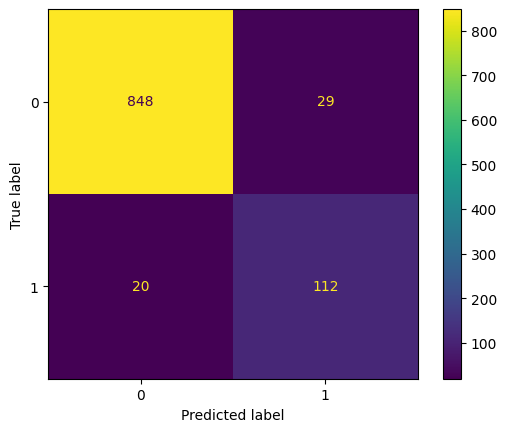

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# plot confusion matrix

cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf_tree.classes_)

disp.plot();

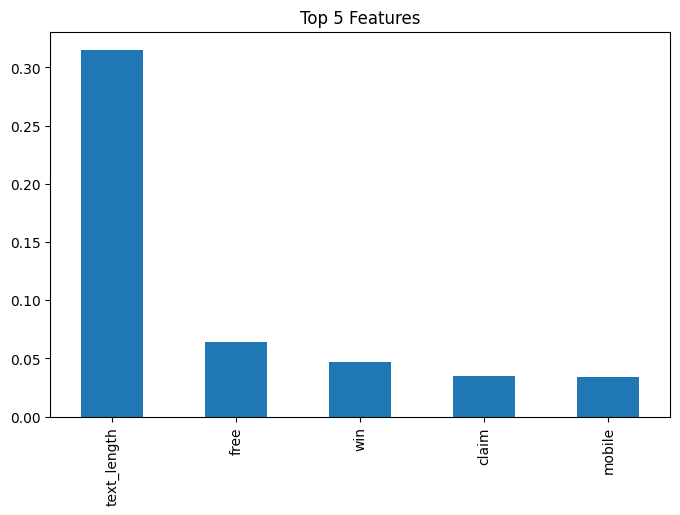

In [30]:
# Plot the feature importance

import matplotlib.pyplot as plt

def feature_importance_plot(model, X_train, n):
    """Plots feature importance - this only works for Random Forest and XGBoost Models

    @param model - the trained model
    @param X_train dataframe - the training dataset
    @param n int - the number of features we are interested in plotting
    
    @return a plot with the Top n features
    """
    
    plt.figure(figsize=(8, 5)) # set figure size
    feat_importances = pd.Series(model.feature_importances_,
                                 index = X_train.columns)
    feat_importances.nlargest(n).plot(kind = 'bar')
    plt.title(f"Top {n} Features")
    plt.show()


feature_importance_plot(clf_tree, X_train, n = 5)
